## Asymmetries on line bisectors

In [53]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'legend.fontsize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }

plt.rcParams.update(params)

In [54]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\Values_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\Values_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).drop_duplicates('Observed wavelength',keep='first').reset_index(drop=True) #Dont take repeated values when concatenate

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown']

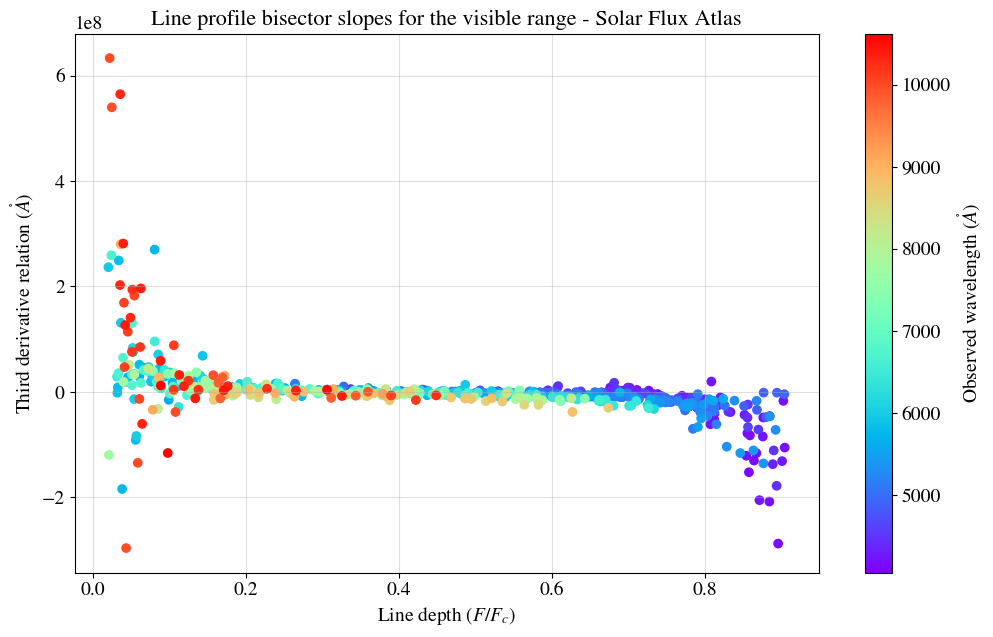

In [ ]:
fig1, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Bisector slope'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line profile bisector slopes for the visible range - Solar Flux Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax.grid(alpha=0.4)

# fig1.savefig('Bisector_VIS')

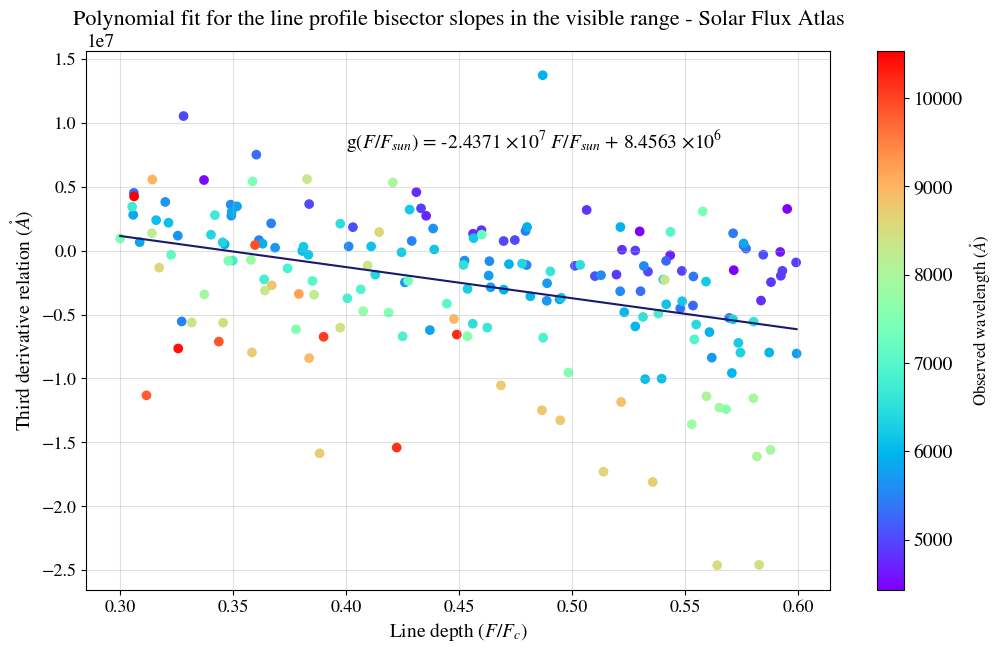

In [ ]:
#In the report is given in function of the velocity
values_VIS_standard = VIS_data[VIS_data['Line Depth'].between(0.3,0.6,inclusive='right')]

pol = Polynomial.fit(values_VIS_standard['Line Depth'],values_VIS_standard['Bisector slope'], 1)
param = pol.convert().coef
values_vel = np.linspace(min(values_VIS_standard['Line Depth']), max(values_VIS_standard['Line Depth']), len(values_VIS_standard['Line Depth']))
vel_fit = pol(values_vel)

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(12,7))

ax1.set_title(r'Polynomial fit for the line profile bisector slopes in the visible range - Solar Flux Atlas')

scatter = ax1.scatter(values_VIS_standard['Line Depth'],values_VIS_standard['Bisector slope'],c=values_VIS_standard["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax1.plot(values_vel,vel_fit,c='midnightblue')
ax1.text(0.4,0.8e7,rf'g($F/F_{{sun}}$) = {round(param[1]*1e-7,4)} $\times 10^{{7}}$ $F/F_{{sun}}$ + {round(param[0]*1e-6,4)} $\times 10^{{6}}$')
ax1.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax1.set_xlabel(r'Line depth $(F/F_{c})$')
ax1.grid(alpha=0.4)
ax1.tick_params(axis='both',labelsize=13)

# fig2.savefig('Bisector slope_VIS')

In [47]:
param

array([  8456324.02477333, -24370790.74400778])

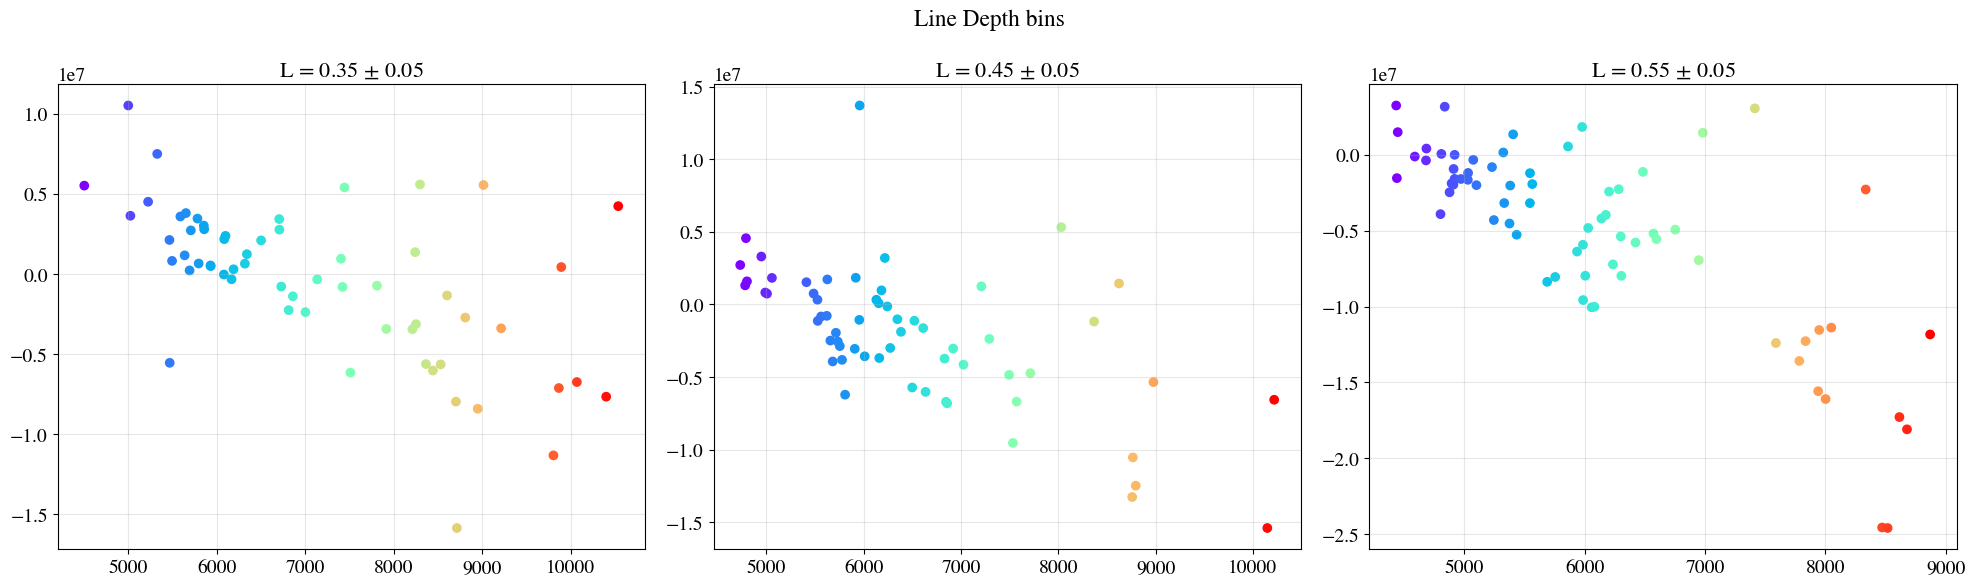

In [71]:
#Organize the dataframe wtih ascending velocities
listed = values_VIS_standard.sort_values('Line Depth', ascending=True, na_position='first').reset_index(drop=True)
velocity_ALL = []

#Make the markers like profesor Benjamin
markers = [0.35,0.45,0.55]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_ALL.append(values_VIS_standard[values_VIS_standard['Line Depth'].between(each-0.05, each+0.05, inclusive='neither')])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Line Depth bins')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_ALL[i]['Observed wavelength'],velocity_ALL[i]['Bisector slope'],c=velocity_ALL[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'L = {markers[i]} $\pm$ 0.05')
        ax.grid(True, alpha=0.3)

fig.tight_layout()

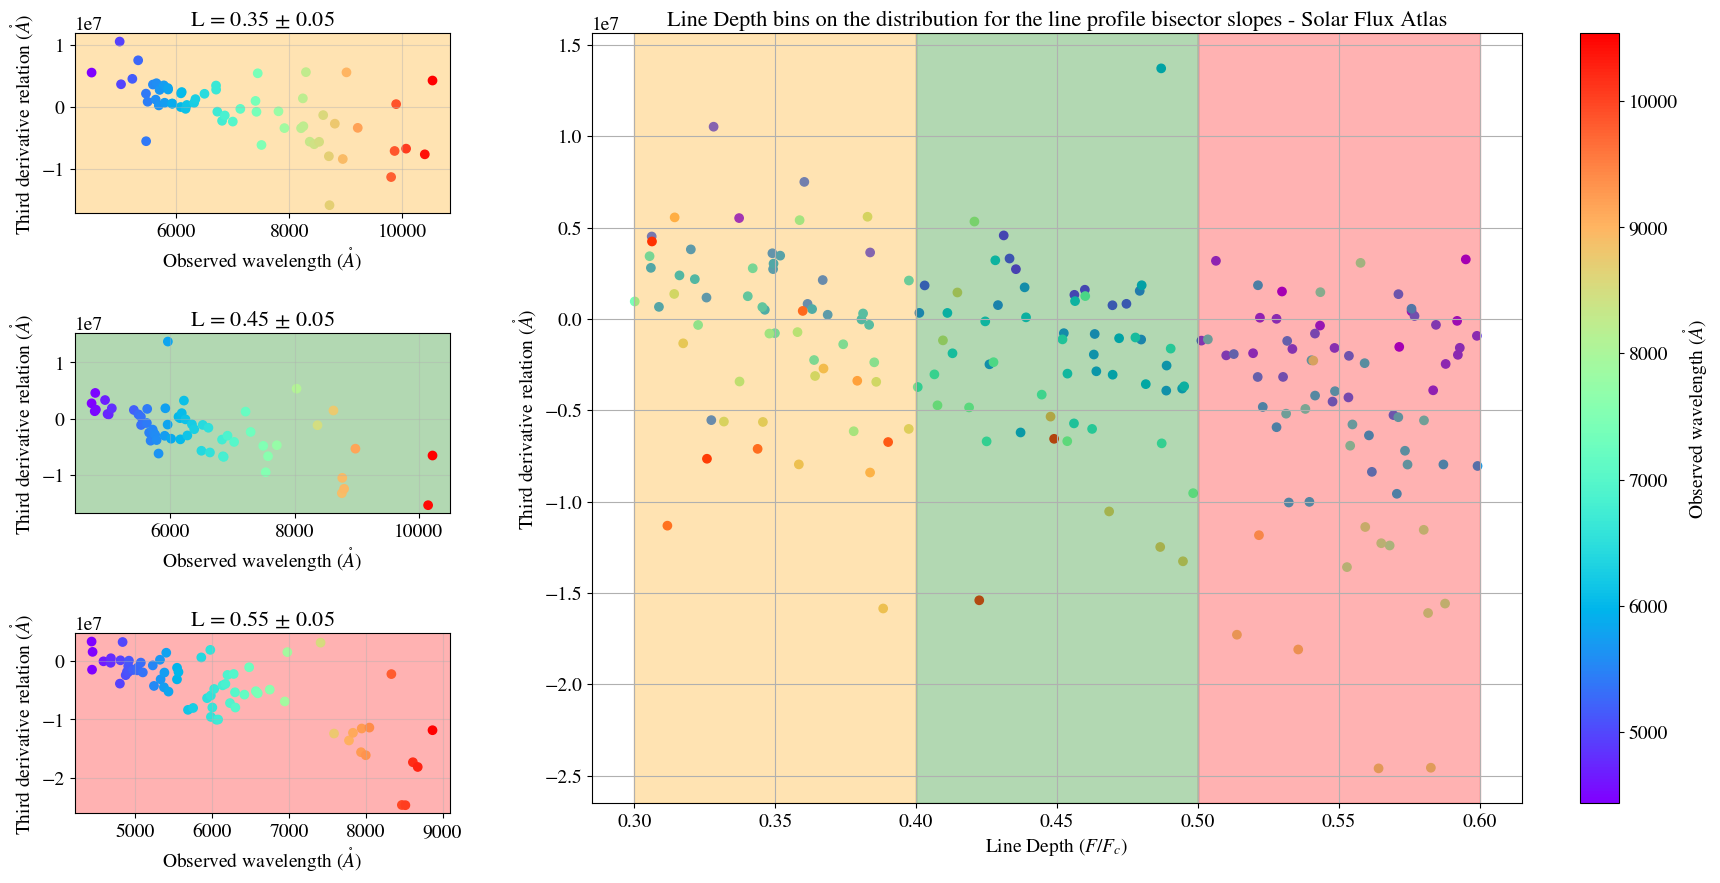

In [ ]:
#Another form to graph

fig3, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(values_VIS_standard['Line Depth'],values_VIS_standard['Bisector slope'],c=values_VIS_standard["Observed wavelength"],cmap='rainbow',lw=1)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line Depth bins on the distribution for the line profile bisector slopes - Solar Flux Atlas')
ax.set_xlabel(r'Line Depth $(F/F_c)$')
ax.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig3.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig3.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig3.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_ALL[i]['Observed wavelength'],velocity_ALL[i]['Bisector slope'],c=velocity_ALL[i]["Observed wavelength"],cmap='rainbow')
ax_inseti.set_title(f'L = {markers[i]} $\pm$ 0.05')
ax_inseti.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax_inseti.set_xlabel(r'Observed wavelength $(\mathring{A})$')
ax_inseti.grid(alpha=0.4)

j=1
ax_insetj.scatter(velocity_ALL[j]['Observed wavelength'],velocity_ALL[j]['Bisector slope'],c=velocity_ALL[j]["Observed wavelength"],cmap='rainbow')
ax_insetj.set_title(f'L = {markers[j]} $\pm$ 0.05')
ax_insetj.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax_insetj.set_xlabel(r'Observed wavelength $(\mathring{A})$')
ax_insetj.grid(alpha=0.4)

k=2
ax_insetk.scatter(velocity_ALL[k]['Observed wavelength'],velocity_ALL[k]['Bisector slope'],c=velocity_ALL[k]["Observed wavelength"],cmap='rainbow')
ax_insetk.set_title(f'L = {markers[k]} $\pm$ 0.05')
ax_insetk.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax_insetk.set_xlabel(r'Observed wavelength $(\mathring{A})$')
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axvspan(markers[i]-0.05, markers[i]+0.05, alpha=0.3, color='orange')
ax.axvspan(markers[j]-0.05, markers[j]+0.05, alpha=0.3, color='green')
ax.axvspan(markers[k]-0.05, markers[k]+0.05, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.3))
ax_insetj.set_facecolor(color=('green', 0.3))
ax_insetk.set_facecolor(color=('red', 0.3))

# fig3.savefig('Velocity bins bisector plot_ALL', bbox_inches='tight')

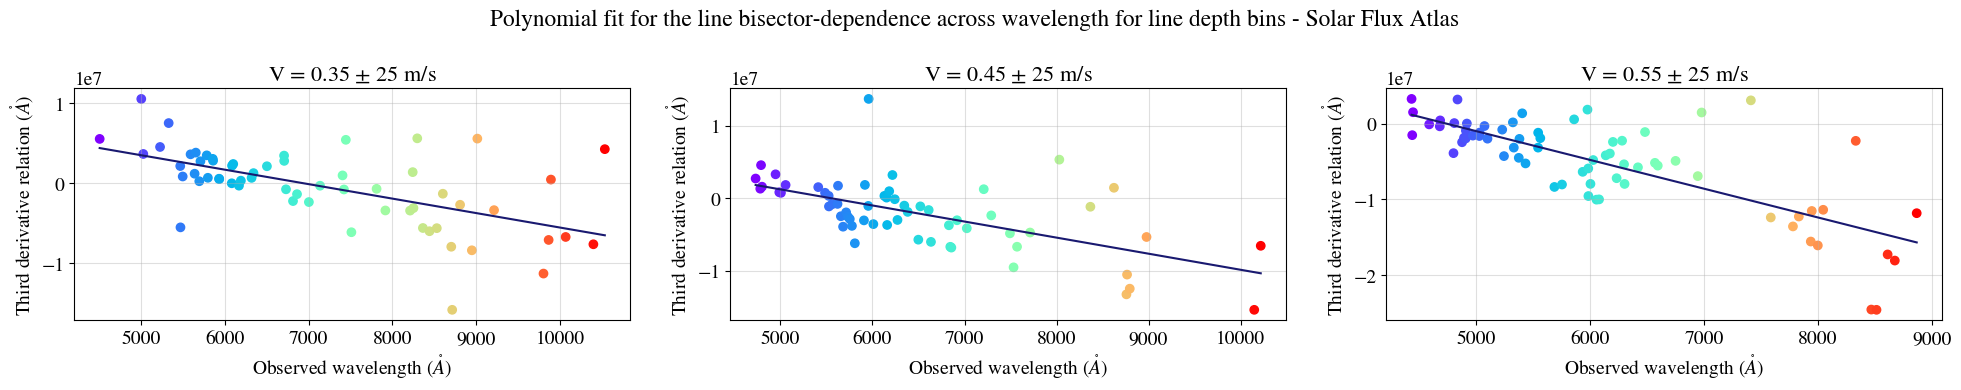

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_ALL = []
values_param_ALL = []
wave_ALL = []
cov_ALL = []

for i in range(len(velocity_ALL)):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_ALL[i]

    #polynomial fit
    _,cov = np.polyfit(new_data['Observed wavelength'],new_data['Bisector slope'], 1,cov=True)
    pol = Polynomial.fit(new_data['Observed wavelength'],new_data['Bisector slope'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    cov_ALL.append(np.sqrt(np.diag(cov)))
    fits_ALL.append([values_flux,flux_fit])
    values_param_ALL.append(pd.DataFrame(param))
    wave_ALL.append(new_data)

values_param_ALL = pd.concat(values_param_ALL,axis=1).T.reset_index(drop=True)
values_param_ALL.columns = ['Shift','Slope']
values_param_ALL = values_param_ALL.set_axis(markers, axis=0)

#Take just the values that we want
velocity_ALL_new = velocity_ALL
markers_new = markers

fig5, axes = plt.subplots(1, 3, figsize=(20, 4))
fig5.suptitle('Polynomial fit for the line bisector-dependence across wavelength for line depth bins - Solar Flux Atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_ALL):
        
        ax.scatter(wave_ALL[i]['Observed wavelength'],wave_ALL[i]['Bisector slope'],c=wave_ALL[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_ALL[i][0],fits_ALL[i][1],color='midnightblue')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Observed wavelength $(\mathring{A})$')
        ax.set_ylabel(r'Third derivative relation $(\mathring{A})$')
        ax.grid(alpha=0.4)

fig5.tight_layout()
plt.show()

# fig5.savefig('Velocity bins bisector ALL')

### Spatially Resolved Quiet Sun Atlas

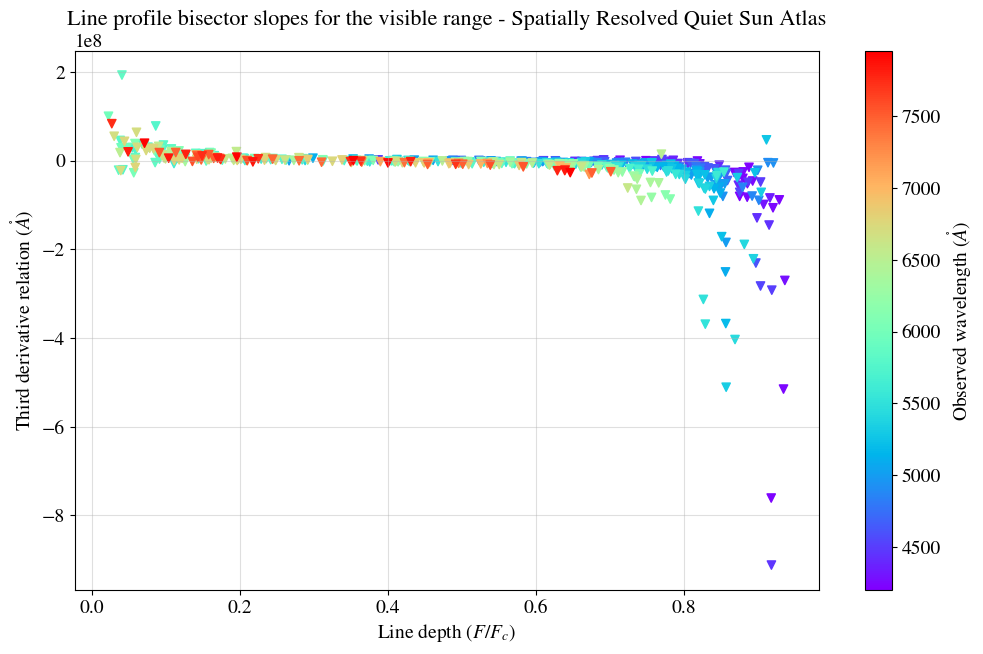

In [ ]:
fig2, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Bisector slope'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line profile bisector slopes for the visible range - Spatially Resolved Quiet Sun Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax.grid(alpha=0.4)

# fig2.savefig('Bisector_SPA')

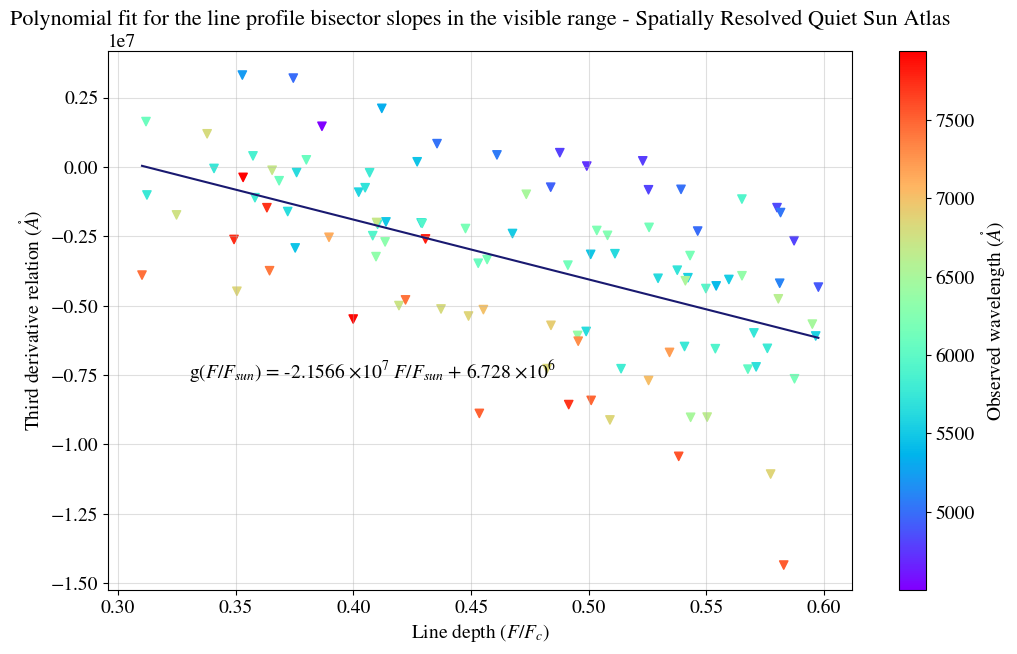

In [ ]:
#In the report is given in function of the velocity
values_SPA_slope = SPA_data[SPA_data['Line Depth'].between(0.3,0.6,inclusive='right')]

pol = Polynomial.fit(values_SPA_slope['Line Depth'],values_SPA_slope['Bisector slope'], 1)
param = pol.convert().coef
values_vel = np.linspace(min(values_SPA_slope['Line Depth']), max(values_SPA_slope['Line Depth']), len(values_SPA_slope['Line Depth']))
vel_fit = pol(values_vel)

#Plot for fixed the zero point of velocity
fig3, ax1 = plt.subplots(1,1,figsize=(12,7))

ax1.set_title(r'Polynomial fit for the line profile bisector slopes in the visible range - Spatially Resolved Quiet Sun Atlas')

scatter = ax1.scatter(values_SPA_slope['Line Depth'],values_SPA_slope['Bisector slope'],c=values_SPA_slope["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax1.plot(values_vel,vel_fit,c='midnightblue')
ax1.text(0.33,-0.76e7,rf'g($F/F_{{sun}}$) = {round(param[1]*1e-7,4)} $\times 10^{{7}}$ $F/F_{{sun}}$ + {round(param[0]*1e-6,4)} $\times 10^{{6}}$')
ax1.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax1.set_xlabel(r'Line depth $(F/F_{c})$')
ax1.grid(alpha=0.4)
ax1.tick_params(axis='both')

# fig3.savefig('Bisector slope_SPA')

In [50]:
param

array([  6727950.02637496, -21566128.90853342])

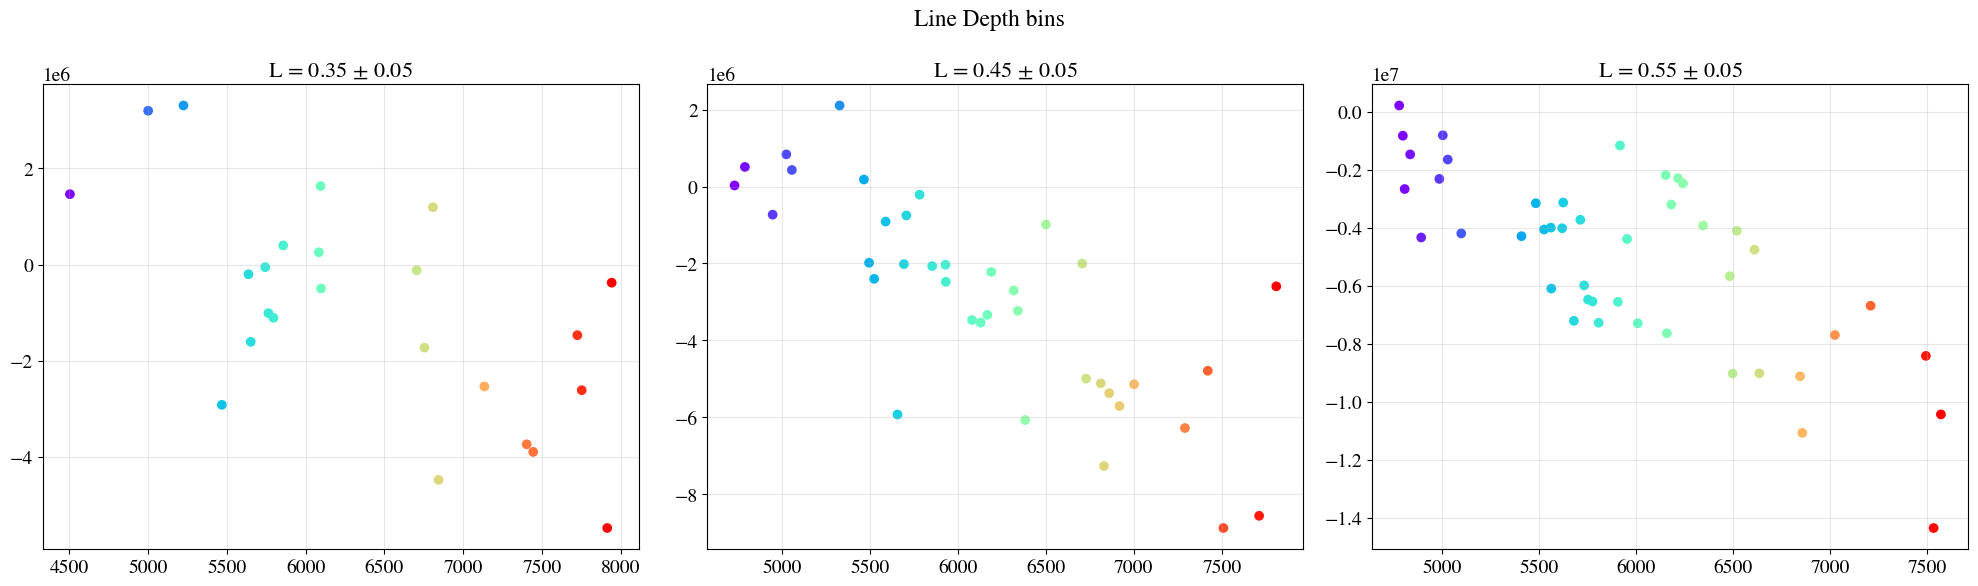

In [85]:
#Organize the dataframe wtih ascending velocities
listed = values_SPA_slope.sort_values('Line Depth', ascending=True, na_position='first').reset_index(drop=True)
velocity_ALL = []

#Make the markers like profesor Benjamin
markers = [0.35,0.45,0.55]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_ALL.append(values_SPA_slope[values_SPA_slope['Line Depth'].between(each-0.05, each+0.05, inclusive='neither')])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Line Depth bins')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_ALL[i]['Observed wavelength'],velocity_ALL[i]['Bisector slope'],c=velocity_ALL[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'L = {markers[i]} $\pm$ 0.05')
        ax.grid(True, alpha=0.3)

fig.tight_layout()

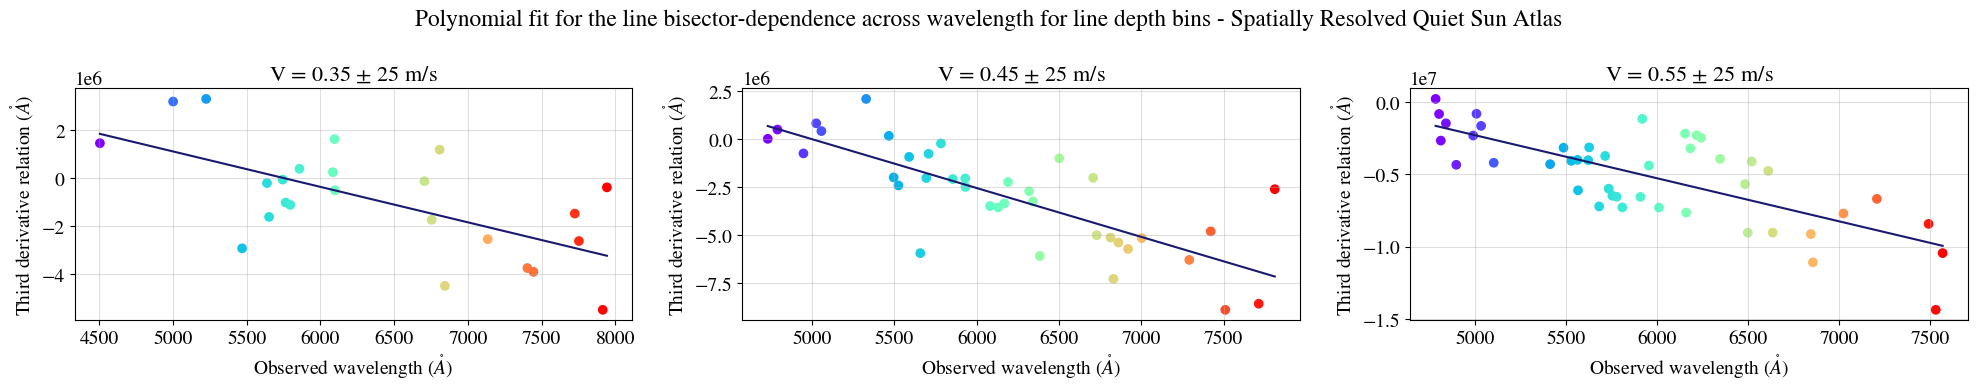

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_ALL = []
values_param_ALL = []
wave_ALL = []
cov_ALL = []

for i in range(len(velocity_ALL)):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_ALL[i]

    #polynomial fit
    _,cov = np.polyfit(new_data['Observed wavelength'],new_data['Bisector slope'], 1,cov=True)
    pol = Polynomial.fit(new_data['Observed wavelength'],new_data['Bisector slope'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    cov_ALL.append(np.sqrt(np.diag(cov)))
    fits_ALL.append([values_flux,flux_fit])
    values_param_ALL.append(pd.DataFrame(param))
    wave_ALL.append(new_data)

values_param_ALL = pd.concat(values_param_ALL,axis=1).T.reset_index(drop=True)
values_param_ALL.columns = ['Shift','Slope']
values_param_ALL = values_param_ALL.set_axis(markers, axis=0)

#Take just the values that we want
velocity_ALL_new = velocity_ALL
markers_new = markers

fig5, axes = plt.subplots(1, 3, figsize=(20, 4))
fig5.suptitle('Polynomial fit for the line bisector-dependence across wavelength for line depth bins - Spatially Resolved Quiet Sun Atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_ALL):
        
        ax.scatter(wave_ALL[i]['Observed wavelength'],wave_ALL[i]['Bisector slope'],c=wave_ALL[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_ALL[i][0],fits_ALL[i][1],color='midnightblue')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Observed wavelength $(\mathring{A})$')
        ax.set_ylabel(r'Third derivative relation $(\mathring{A})$')
        ax.grid(alpha=0.4)

fig5.tight_layout()
plt.show()

# fig5.savefig('Velocity bins bisector SPA')

### NIR

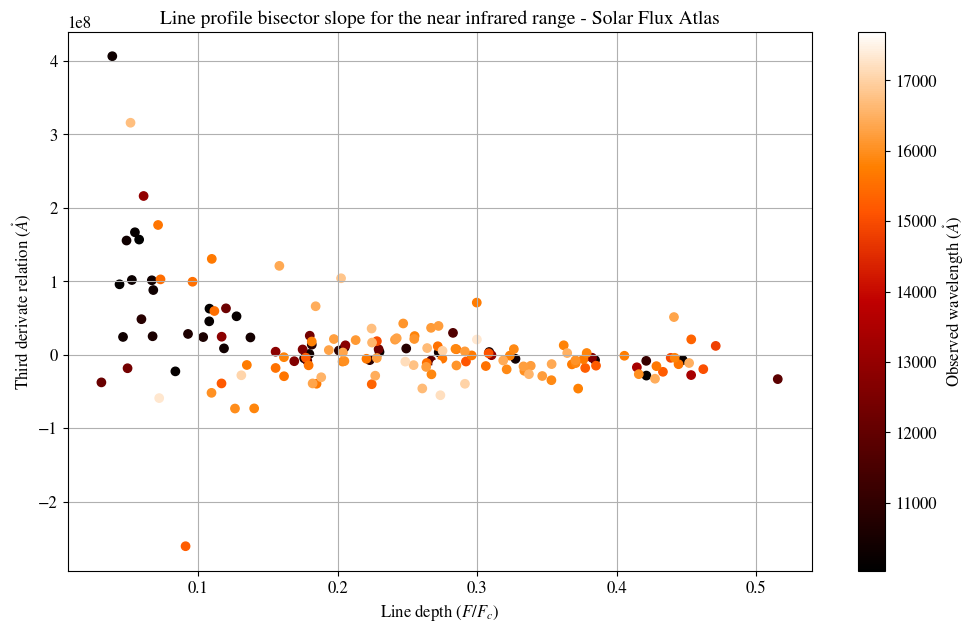

In [51]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(NIR_data['Line Depth'],NIR_data['Bisector slope'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line profile bisector slope for the near infrared range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Third derivate relation $(\mathring{A})$',fontsize=12)
ax.grid()

# fig3.savefig('Bisector_NIR.pdf')

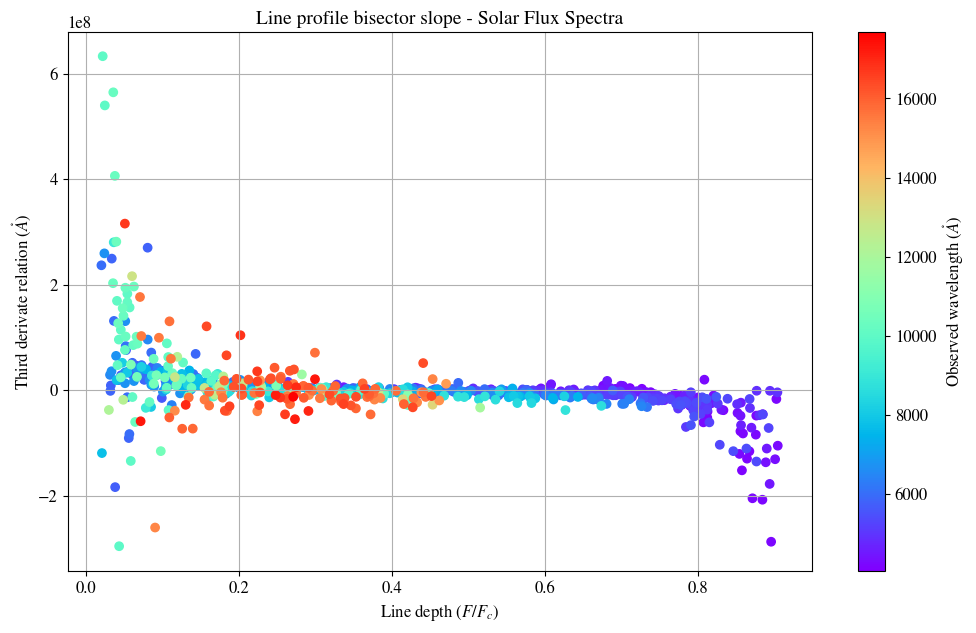

In [52]:
fig4, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(pd.concat([VIS_data['Line Depth'],NIR_data['Line Depth']],axis=0),
                     pd.concat([VIS_data['Bisector slope'],NIR_data['Bisector slope']],axis=0),
                     c=pd.concat([VIS_data["Observed wavelength"],NIR_data["Observed wavelength"]],axis=0),cmap='rainbow',lw=1,marker='o')


cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line profile bisector slope - Solar Flux Spectra',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Third derivate relation $(\mathring{A})$',fontsize=12)

ax.grid()

# fig4.savefig('Bisector_ALL.pdf')